In [454]:
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

from sklearn.preprocessing import MultiLabelBinarizer
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, GlobalAveragePooling2D, Dropout, BatchNormalization, Conv2D, Activation
from tensorflow.keras.applications import EfficientNetB7, ResNet50 
from sklearn.model_selection import train_test_split

#from keras.models import Sequential
#from keras.wrappers.scikit_learn import KerasClassifier
#from keras.utils import np_utils
#from sklearn.model_selection import cross_val_score
#from sklearn.preprocessing import LabelEncoder
#from sklearn.pipeline import Pipeline 

In [563]:
# before data augmentation: split in train and validation, because on the validationset no data augmentation
# X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(paths, labels, test_size = 0.2, tensor = 42)
from skimage.transform import resize
from keras.utils import to_categorical
from PIL import Image


In [605]:
# Function to stack te 4 channels into 1 image
    
def stack(path, mt, nu, er, tp): 
    microtubule = plt.imread(path + mt) 
    endoplasmicrec = plt.imread(path + er)    
    nuclei = plt.imread(path + nu)
    protein = plt.imread(path + tp)
    img = np.dstack((microtubule, endoplasmicrec, nuclei, protein))
    return img

# one hot encode the labels 5 --> [0000010000000000000]
def one_hot(lbl): 
    lbl = str(lbl)
    x = lbl.split('|')
    one_hot_lbl = tf.keras.utils.to_categorical(lbl, num_classes=19)
    #mlb = MultiLabelBinarizer(classes = ([str(i) for i in range(19)]))
    #one_hot_lbl = mlb.fit_transform(x)
    
    return one_hot_lbl #sum(one_hot_lbl)

# get the datasets to train on. Either validation or training for full or unique
def get_train_or_valid(path, df):
    X = [] # append here the 4 channels as 1 image: size = None, None, 4. This will be used for training/valid
    y = [] # append here the label from the stacked label. This will be used for training/valid
    for i, row in df[for random 32].iterrows():
                img = row.ID
                ids = os.path.basename(img)
                count_cell = row.n_cells
                lbl = row.Label
                #if 'n_aug' not in df.columns or row.n_aug == 0:
                for i in range(1, count_cell+1):
                    mt = ids+"_"+str(i)+"_mt.png"
                    nu = ids+"_"+str(i)+"_nu.png"
                    er = ids+"_"+str(i)+"_er.png"
                    tp = ids+"_"+str(i)+"_tp.png"
                    stacked_img = stack(path, mt, nu, er, tp)
                    #im = Image.fromarray((stacked_img*255).astype(np.uint8))
                    #im.save('C:/Users/20182519/Documents/Jaar 3/Kwartiel 4/BEP/test.png')
                    # im = Image.fromarray(stacked_img)
                    # im.save("C:/Users/20182519/Documents/Jaar 3/Kwartiel 4/BEP/test.png")
                    # stacked_img = stacked_img.astype(float32)
                    stacked_img = resize(stacked_img, (200, 200))
                    X.append(stacked_img)
                    y.append(one_hot(lbl))   
                    
                if "n_aug" in df.columns and row.n_aug >= 1:
                    for x in range(1,row.n_aug+1): 
                        for i in range(1, count_cell+1):
                            mt = "aug_"+str(x)+"_"+ids+"_"+str(i)+"_mt.png"
                            nu = "aug_"+str(x)+"_"+ids+"_"+str(i)+"_nu.png"
                            er = "aug_"+str(x)+"_"+ids+"_"+str(i)+"_er.png"
                            tp = "aug_"+str(x)+"_"+ids+"_"+str(i)+"_tp.png"
                            stacked_img = stack(path, mt, nu, er, tp)
                            # im = Image.fromarray(stacked_img)
                            # im.save("C:/Users/20182519/Documents/Jaar 3/Kwartiel 4/BEP/test.png")
                            # stacked_img = stacked_img.astype(float32)
                            #im = Image.fromarray((stacked_img*255).astype(np.uint8))
                            #im.save('C:/Users/20182519/Documents/Jaar 3/Kwartiel 4/BEP/test.png')
                            stacked_img = resize(stacked_img, (200, 200))
                            X.append(stacked_img)
                            y.append(one_hot(lbl)) 
    
    return np.array(X), np.array(y) 

In [594]:
# Test the code with 1 image in a new dataframe 
# test_img = "aug_1_5e22a522-bb99-11e8-b2b9-ac1f6b6435d0_1_er.png"
d = {'ID': ["5e22a522-bb99-11e8-b2b9-ac1f6b6435d0"], 'Label': ["0"], 'n_cells': [1], "n_aug":[1]}
df = pd.DataFrame(data=d)
print(df)

                                     ID Label  n_cells  n_aug
0  5e22a522-bb99-11e8-b2b9-ac1f6b6435d0     0        1      1


[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


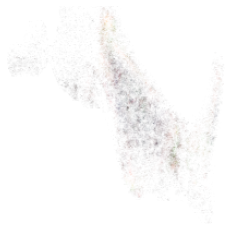

(200, 200, 4)
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


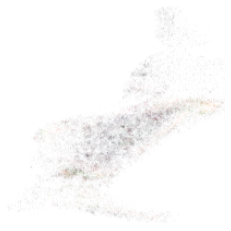

(200, 200, 4)


In [606]:
path = "C:/Users/20182519/Documents/Jaar 3/Kwartiel 4/BEP/Check_augmented_imgs/"
X, y = get_train_or_valid(path, df)
# print(type(X[0]))
#X_tensor = tf.ragged.constant(X)
# print(X_tensor.shape)
# y_tensor = tf.constant(y)
# print(y_tensor.shape)
# dataset = tf.data.Dataset.from_tensor_slices((X_tensor, y_tensor))

# dataset = tf.data.Dataset.from_generator(lambda: X ,tf.int64)
# y = tf.data.Dataset(y)
#X_r = tf.ragged.constant(X)
#y_r = tf.ragged.constant(y)
#X_test = np.array(X, dtype=object)
#y_test = np.array(y, dtype=object)
#tre = X_r.bounding_shape()[-1]

# Plot the image
# tf.keras.preprocessing.image.array_to_img(X[1])
for i in range(len(X_test)):
    plt.imshow(X[i])
    plt.axis("off");
    print(y[i])
    # print(y[1])
    # plt.title(y[i]); 
    plt.show()
    print(X[i].shape)

In [ ]:
# if segmentation is done, load dataframe after segmentation --> CHECK
df_unique = pd.read_csv("df_segmented_unique")
df_full = pd.read_csv("df_segmented_full")

# split the dataframe in train and validation set --> CHECK for unique
train_df_unique, valid_df_unique = train_test_split(df_unique, test_size = 0.2)
train_df_full, valid_df_full = train_test_split(df_full, test_size = 0.2)

# Then perform data augmentation on the train_unique images and train_full images
# Result is the following: train_unique_aug and train_full_aug 
# valid_unique, valid_full --> load those dataframes

# copie the segmented HPA+original to the augmented data = 
dir_full_aug = "/media/beta/mitko-beps/data/train_full_segmented_aug"
dir_unique_aug = "/media/beta/mitko-beps/data/train_unique_segmented_aug"

# segmented HPA+original = 
dir_full_seg = "/media/beta/mitko-beps/data/train_full_segmented"
dir_unique_seg = "/media/beta/mitko-beps/data/train_unique_segmented"

# Dataset for pretraining --> De code werkt! Alleen nog dit uitvoeren 
X_train_full, y_train_full = get_train_or_valid(dir_full_aug, df_train_full_aug)
X_valid_full, y_valid_full = get_train_or_valid(dir_full_seg, df_valid_full)

# Dataset for fine-tuning
X_train_unique, y_train_unique = get_train_or_valid(dir_unique_aug, df_train_unique_aug)
X_valid_unique, y_valid_unique = get_train_or_valid(dir_unique_seg, df_valid_unique)

# Wat er dan uitkomt is het volgende: een X_train met alle plaatjes gestacked daarin. Een X_validation met ook daar de gestackde 
# plaatjes daarin. y_train en y_val bevatten de labels van de images in X_train en X_val. Dit voor zowel unique als voor full. 
# Gebruik dit voor pre-train en fine-tune. Note: train plaatjes hebben een gebalanceerde label distributie, validation set niet!

# ID Label n_cells n_aug
# 1    1     3       1 
# 2    4     2       0 

In [574]:
# Set some parameters 
batch_size = 30
num_classes = 19
epochs = 30
input_shape = (None, None, 4)
drop_out = 0.2

def generator(arrays, batch_size):
    """Generate batches, one with respect to each array's first axis."""
    starts = [0] * len(arrays)  # pointers to where we are in iteration
    while True:
        batches = []
        for i, array in enumerate(arrays):
            start = starts[i]
            stop = start + batch_size
            diff = stop - array.shape[0]
            if diff <= 0:
                batch = array[start:stop]
                starts[i] += batch_size
            else:
                batch = np.concatenate((array[start:], array[:diff]))
                starts[i] = diff
            batches.append(batch)
        yield batches

# Building the model --> Investigate which layers I want to use!
def build_model(num_classes):
    
    inputs = Input(input_shape)
    model = EfficientNetB7(include_top=False, input_tensor=inputs, weights=None) #"imagenet"
    # Freeze the pretrained weights
    # model.trainable = False

    # Rebuild top    
    x = Conv2D(filters=num_classes, kernel_size=1, strides=1)(model.output)
    x = tf.keras.layers.Dropout(0.2)(x)
    x = GlobalAveragePooling2D()(x)
    x = BatchNormalization()(x)
    outputs = Activation('softmax')(x)
    
    # When using a dense layer --> does this work to? 
    # x = GlobalAveragePooling2D(name="avg_pool")(model.output)
    # x = BatchNormalization()(x) 
    # outputs = Dense(num_classes, activation="softmax")(x)
     
    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNet")
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"]
    )
    
    return model

# epochs = 25  # @param {type: "slider", min:8, max:80}
# hist = model.fit(X, epochs=epochs, validation_data=X, verbose=2)
# plot_hist(hist)

In [575]:
model = build_model(num_classes=num_classes)

In [576]:
model.summary()

Model: "EfficientNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_45 (InputLayer)           [(None, None, None,  0                                            
__________________________________________________________________________________________________
rescaling_25 (Rescaling)        (None, None, None, 4 0           input_45[0][0]                   
__________________________________________________________________________________________________
normalization_25 (Normalization (None, None, None, 4 9           rescaling_25[0][0]               
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, None, None, 4 0           normalization_25[0][0]           
_______________________________________________________________________________________

__________________________________________________________________________________________________
block6f_drop (Dropout)          (None, None, None, 3 0           block6f_project_bn[0][0]         
__________________________________________________________________________________________________
block6f_add (Add)               (None, None, None, 3 0           block6f_drop[0][0]               
                                                                 block6e_add[0][0]                
__________________________________________________________________________________________________
block6g_expand_conv (Conv2D)    (None, None, None, 2 884736      block6f_add[0][0]                
__________________________________________________________________________________________________
block6g_expand_bn (BatchNormali (None, None, None, 2 9216        block6g_expand_conv[0][0]        
__________________________________________________________________________________________________
block6g_ex

In [589]:
print(type(X))
print(X.shape)
print(y.shape)
for seq in X: 
    print(np.array(seq).shape)

<class 'numpy.ndarray'>
(2, 100, 150, 4)
(2, 19)
(100, 150, 4)
(100, 150, 4)


In [607]:
epochs = 25 # @param {type: "slider", min:8, max:80}

# y = tf.convert_to_tensor(y)
# print(type(X))
# print((X.shape))
# print((y.shape))

# for i in range(len(X))
history = model.fit(X,y, epochs = epochs)

# If resize the images to the same size, then I can create a X = (Batch_size, width, hight, channels)
# Then I can train my model with model.fit. 
# However when I train my model on NOT RESIZED images, then I can not create a X = (Batch_size, width, hight, channels)
# The best I can do is create X = (Batch_size, )
# However I receive the following error: 

# Question: How to generate a dataset so that I do not get this error? Where to adjust? In the stacking, in saving in the array
# which type? 

Epoch 1/25
1/1 [==============================] - 6s 6s/step - loss: 2.8512 - accuracy: 0.5000
Epoch 2/25
1/1 [==============================] - 5s 5s/step - loss: 2.8515 - accuracy: 0.0000e+00
Epoch 3/25
1/1 [==============================] - 4s 4s/step - loss: 2.8492 - accuracy: 0.0000e+00
Epoch 4/25
1/1 [==============================] - 4s 4s/step - loss: 2.8464 - accuracy: 0.5000
Epoch 5/25
1/1 [==============================] - 4s 4s/step - loss: 2.8446 - accuracy: 0.0000e+00
Epoch 6/25
1/1 [==============================] - 4s 4s/step - loss: 2.8435 - accuracy: 0.0000e+00
Epoch 7/25
1/1 [==============================] - 4s 4s/step - loss: 2.8415 - accuracy: 0.5000
Epoch 8/25
1/1 [==============================] - 6s 6s/step - loss: 2.8394 - accuracy: 0.5000
Epoch 9/25
1/1 [==============================] - 5s 5s/step - loss: 2.8369 - accuracy: 0.5000
Epoch 10/25
1/1 [==============================] - 4s 4s/step - loss: 2.8351 - accuracy: 0.5000
Epoch 11/25
1/1 [================

In [601]:
print(X[0].shape)
print(y[0].shape)

(200, 200, 4)
(19,)


In [592]:
history = model.fit(X,y, epochs = epochs)


ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type numpy.ndarray).

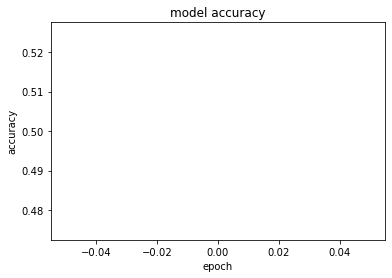

In [148]:
def plot_hist(hist):
    plt.plot(hist.history["accuracy"])
    # plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    # plt.legend(["train", "validation"], loc="upper left")
    plt.show()

plot_hist(history)


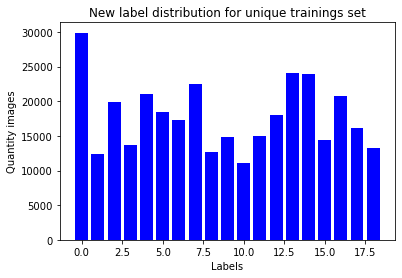

In [127]:
dictionary = {0: 29886, 1: 12402, 2: 19860, 3: 13723, 4: 21004, 5: 18475, 6: 17299, 7: 22520, 8: 12720, 9: 14896, 10: 11013, 11: 14994, 12: 17993, 13: 24042, 14: 23946, 15: 14371, 16: 20812, 17: 16093, 18: 13302}

import matplotlib.pyplot as plt
plt.bar(list(dictionary.keys()), dictionary.values(), color='b')
plt.title("New label distribution for unique trainings set")
plt.xlabel("Labels")
plt.ylabel("Quantity images")
plt.show()
